### Diamond Price Prediction 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the Data

In [3]:
df = pd.read_csv('diamonds.csv')
display(df.head(3))

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


### Data preprocessing

In [4]:
df.shape

(53940, 10)

In [5]:
#checking for null values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#Information of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


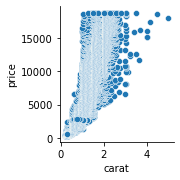

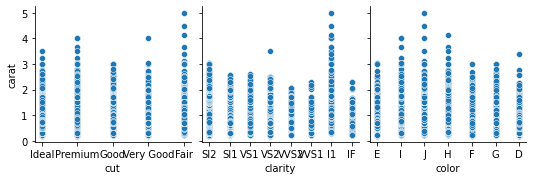

In [7]:
#Performing simple EDA to understand data
#Now we plot a Pair-plot of Price vs. 4 Cs (Carat, Cut, Color, Clarity) — the most popular and marketed properties of a diamond.

# plot price vs. carat
sns.pairplot(df, x_vars=['carat'], y_vars = ['price'])
# plot carat vs other Cs
sns.pairplot(df, x_vars=['cut', 'clarity', 'color'], y_vars = ['carat'])
plt.show()

bulk of diamonds fall under each property value e.g. most bigger diamonds (higher carat) fall in Fair cut, I1 clarity and H-I color

The price vs. carat chart also show that there are some outliers in the dataset i.e. few diamonds that are really over priced!

In [8]:
#Check for any zero value

linear_vars = df.select_dtypes(include=[np.number]).columns
display(list(linear_vars))
print('0 values →', 0 in df.values)
df[linear_vars] = df[linear_vars] + 0.01
print('Filled all 0 values with 0.01. Now any 0 values? →', 0 in df.values)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

0 values → True
Filled all 0 values with 0.01. Now any 0 values? → False


In [9]:
import sklearn

print(sklearn.__version__)

0.24.2


In [10]:
y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table']]

In [11]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [12]:
X_train.head()

,carat,cut,color,clarity,depth,table
29477,0.33,Ideal,F,VS1,61.31,56.01
52542,0.73,Very Good,I,VVS2,61.71,55.01
8725,0.39,Very Good,D,SI1,62.01,55.01
15577,1.01,Very Good,H,VVS2,62.61,56.01
19651,1.71,Premium,H,SI2,59.81,61.01


In [13]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37758, 6) (37758,)
(16182, 6) (16182,)


### Seperating categorical and numerical column

In [14]:
X_train.head()

,carat,cut,color,clarity,depth,table
29477,0.33,Ideal,F,VS1,61.31,56.01
52542,0.73,Very Good,I,VVS2,61.71,55.01
8725,0.39,Very Good,D,SI1,62.01,55.01
15577,1.01,Very Good,H,VVS2,62.61,56.01
19651,1.71,Premium,H,SI2,59.81,61.01


In [15]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
dtype: object

In [16]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
29477,Ideal,F,VS1
52542,Very Good,I,VVS2
8725,Very Good,D,SI1
15577,Very Good,H,VVS2
19651,Premium,H,SI2


In [17]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table
29477,0.33,61.31,56.01
52542,0.73,61.71,55.01
8725,0.39,62.01,55.01
15577,1.01,62.61,56.01
19651,1.71,59.81,61.01


### Scaling numerical column

In [18]:
X_train_num.head()

,carat,depth,table
29477,0.33,61.31,56.01
52542,0.73,61.71,55.01
8725,0.39,62.01,55.01
15577,1.01,62.61,56.01
19651,1.71,59.81,61.01


In [19]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table
29477,-1.007784,-0.316595,-0.647912
52542,-0.166198,-0.038325,-1.095448
8725,-0.881547,0.170377,-1.095448
15577,0.422912,0.587782,-0.647912
19651,1.895688,-1.360107,1.589767


### Applying Labelencoding

In [20]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
29477
52542
8725
15577
19651


In [21]:
X_train_cat.cut.unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [22]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
29477,4
52542,3
8725,3
15577,3
19651,5


In [23]:
X_train_cat.color.unique()

array(['F', 'I', 'D', 'H', 'G', 'E', 'J'], dtype=object)

In [24]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
29477,4,5
52542,3,2
8725,3,7
15577,3,3
19651,5,3


In [25]:
X_train_cat.clarity.unique()

array(['VS1', 'VVS2', 'SI1', 'SI2', 'VVS1', 'VS2', 'I1', 'IF'],
      dtype=object)

In [26]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
29477,4,5,5
52542,3,2,6
8725,3,7,3
15577,3,3,6
19651,5,3,2


### Concatinating rescaled and encoded columns

In [27]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,cut,color,clarity
29477,-1.007784,-0.316595,-0.647912,4,5,5
52542,-0.166198,-0.038325,-1.095448,3,2,6
8725,-0.881547,0.170377,-1.095448,3,7,3
15577,0.422912,0.587782,-0.647912,3,3,6
19651,1.895688,-1.360107,1.589767,5,3,2


#### preparing Test data

In [28]:
X_test.head()

,carat,cut,color,clarity,depth,table
52264,0.58,Ideal,E,VS2,61.51,57.01
21073,1.17,Ideal,G,VS1,61.51,55.01
42161,0.52,Ideal,G,SI1,63.21,58.01
35974,0.43,Ideal,F,VS1,60.61,56.01
7641,0.81,Premium,G,IF,62.61,58.01


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16182 entries, 52264 to 1319
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16182 non-null  float64
 1   cut      16182 non-null  object 
 2   color    16182 non-null  object 
 3   clarity  16182 non-null  object 
 4   depth    16182 non-null  float64
 5   table    16182 non-null  float64
dtypes: float64(3), object(3)
memory usage: 885.0+ KB


In [30]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
52264,Ideal,E,VS2
21073,Ideal,G,VS1
42161,Ideal,G,SI1
35974,Ideal,F,VS1
7641,Premium,G,IF


In [31]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table
52264,0.58,61.51,57.01
21073,1.17,61.51,55.01
42161,0.52,63.21,58.01
35974,0.43,60.61,56.01
7641,0.81,62.61,58.01


In [32]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table
52264,-0.481793,-0.177460,-0.200377
21073,0.759547,-0.177460,-1.095448
42161,-0.608031,1.005187,0.247159
35974,-0.797388,-0.803567,-0.647912
7641,0.002119,0.587782,0.247159


In [33]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
52264
21073
42161
35974
7641


In [34]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
52264,4,6,4
21073,4,4,5
42161,4,4,3
35974,4,5,5
7641,5,4,8


In [35]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,cut,color,clarity
52264,-0.481793,-0.177460,-0.200377,4,6,4
21073,0.759547,-0.177460,-1.095448,4,4,5
42161,-0.608031,1.005187,0.247159,4,4,3
35974,-0.797388,-0.803567,-0.647912,4,5,5
7641,0.002119,0.587782,0.247159,5,4,8


### Training Linear regressor

In [36]:
from sklearn.linear_model import LinearRegression
# Create an object of LinearRegression model
lr_Regression = LinearRegression()
# Fit the model to X_train and y_train
lr_Regression.fit(X_train_transformed,y_train) 
# Make predictions
y_test_pred = lr_Regression.predict(X_test_transformed)

In [37]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491.01,2474.124019
21073,9248.01,7649.300080
42161,1284.01,660.974976
35974,921.01,1453.425338
7641,4268.01,5982.572881


In [38]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  847.9951578529472
Mean Squared Error:  1509242.658513242
Root Mean Squared Error:  1228.512376214925


In [39]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.r2_score(y_test, y_test_pred)

0.9033247732934748

### KNN regressor

In [40]:
from sklearn.neighbors import KNeighborsRegressor
KNN_Regressor = KNeighborsRegressor(n_neighbors = 8, metric = 'minkowski', p = 2)
KNN_Regressor.fit(X_train_transformed,y_train)
y_test_pred = KNN_Regressor.predict(X_test_transformed)

In [41]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491.01,1769.385
21073,9248.01,8322.010
42161,1284.01,1264.510
35974,921.01,1057.010
7641,4268.01,5616.010


In [42]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  503.6135134717587
Mean Squared Error:  772431.2738855287
Root Mean Squared Error:  878.8806937722143


In [43]:
metrics.r2_score(y_test, y_test_pred)

0.9505215625221884

### DT Regressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train_transformed, y_train)
y_test_pred = DTregressor.predict(X_test_transformed)

In [45]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491.01,1873.01
21073,9248.01,9248.01
42161,1284.01,1266.01
35974,921.01,985.01
7641,4268.01,6338.01


In [46]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  361.5823898982408
Mean Squared Error:  530615.883010375
Root Mean Squared Error:  728.4338563043146


In [47]:
metrics.r2_score(y_test, y_test_pred)

0.966011157652644

### RandomForest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train_transformed,y_train)
y_test_pred = rf.predict(X_test_transformed)

In [49]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
52264,2491.01,1846.943333
21073,9248.01,8405.510000
42161,1284.01,1220.843333
35974,921.01,1028.810000
7641,4268.01,4563.210000


In [50]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  289.59033016100244
Mean Squared Error:  318016.35540157824
Root Mean Squared Error:  563.9293886663278


In [51]:
metrics.r2_score(y_test, y_test_pred)

0.9796293173391237

## Sacing the model

In [53]:
from pickle import dump

dump(scaler, open('ProjectDPP_streamlit/models/standard_scaler.pkl', 'wb'))
dump(lr_Regression, open('ProjectDPP_streamlit/models/lr_model.pkl', 'wb'))
dump(rf, open('ProjectDPP_streamlit/models/randomforest_model.pkl', 'wb'))
dump(KNN_Regressor, open('ProjectDPP_streamlit/models/KNN_Regressor.pkl', 'wb'))
dump(DTregressor, open('ProjectDPP_streamlit/models/DTregressor_model.pkl', 'wb'))

In [55]:
import numpy as np
from pickle import load

In [56]:
#Loading the pretrained classifiers from pickle file
scaler= open('models/standard_scaler.pkl', 'rb')
rf = open('models/randomforest_model.pkl', 'rb')

In [57]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

In [60]:
num_scal=scaler.transform([[1.16 ,61.5 ,55.0 ,6.75 ,6.81 ,4.17]])
num_scal.flatten()

AttributeError: '_io.BufferedReader' object has no attribute 'transform'